1. Environmental Setup and Publication Standards
This section initializes the analytical environment. The visualization parameters are strictly aligned with IEEE standards for technical manuscripts, ensuring that all generated figures are suitable for high-resolution publication.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IEEE-compliant visualization configuration
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 11,
    "figure.figsize": (8, 6),
    "axes.grid": False,
    "savefig.dpi": 300,
    "savefig.bbox": "tight"
})

# Statistical reproducibility
np.random.seed(42)

2. Stochastic Fleet Simulation Engine
The following function implements a discrete-event simulation of an industrial fleet. It models the degradation process using a simplified Arrhenius-based approach, where operational stress directly accelerates the decay of the health index. Furthermore, it incorporates the Maintenance-Quality (M-Q) coupling, where asset health inversely affects the probability of quality defects.

In [2]:
def generate_synthetic_fleet_data(units=100):
    """
    Simulates a fleet of industrial assets under variable stress profiles.
    Models the interdependency between load, health index, and quality.
    """
    fleet_records = []
    
    for i in range(units):
        # Machine-specific operational stress profile
        base_stress = np.random.uniform(0.8, 1.3)
        
        health = 1.0
        cycle = 0
        unit_history = []
        
        while health > 0:
            cycle += 1
            # Instantaneous operational load
            load = np.random.normal(base_stress, 0.05)
            
            # Degradation Model: Exponential wear based on stress
            # Delta H = alpha * exp(beta * load)
            degradation_rate = 0.001 * np.exp(load * 2.0)
            health -= degradation_rate
            
            # Quality Propensity: Defect probability increases as health decays
            # Coupling factor based on a power law
            quality_prob = 0.01 + 0.3 * (1 - health)**3 + np.random.normal(0, 0.01)
            quality_prob = np.clip(quality_prob, 0, 1)
            
            # Indirect Sensor Measurement: Modeled as a function of health with noise
            sensor_signal = 100 + (1 - health) * 50 + np.random.normal(0, 2.0)
            
            unit_history.append({
                'unit_id': i,
                'load': load,
                'health_index': max(0, health),
                'quality_prob': quality_prob,
                'sensor_val': sensor_signal,
                'cycle': cycle
            })
            if health <= 0: break
            
        # Ground Truth Calculation: Remaining Useful Life (RUL)
        max_cycle = cycle
        for record in unit_history:
            record['RUL'] = max_cycle - record['cycle']
            fleet_records.append(record)
            
    return pd.DataFrame(fleet_records)

3. Data Execution and Feature Engineering
In this block, the simulation is executed to generate the primary dataset. The resulting DataFrame represents the historical logs of the manufacturing process, which serve as the foundation for the multivariate analysis.

In [3]:
# Generate validated fleet dataset
df_validation = generate_synthetic_fleet_data(units=100)

# Display structural overview
print(f"Total observations generated: {len(df_validation)}")
print(df_validation.head())

Total observations generated: 12980
   unit_id      load  health_index  quality_prob  sensor_val  cycle  RUL
0        0  0.931676      0.993555      0.013189  100.880348      1  136
1        0  1.037796      0.985585      0.004192   99.670389      2  135
2        0  0.958701      0.978782      0.000762   95.835793      3  134
3        0  1.034789      0.970861      0.018172   98.409213      4  133
4        0  0.965868      0.963959      0.002590  100.395351      5  132


4. Multivariate Correlation Analysis
This section performs a Pearson correlation analysis to validate the theoretical hypotheses of the IPMQ framework. We evaluate the coefficients between operational variables and the target prognostic variable (RUL) to ensure that the simulated physics align with expected industrial behavior.

In [4]:
# Feature selection for correlation assessment
target_columns = ['load', 'health_index', 'quality_prob', 'sensor_val', 'RUL']
correlation_matrix = df_validation[target_columns].corr()

# Quantitative Validation Report
health_rul_corr = correlation_matrix.loc['health_index', 'RUL']
load_rul_corr = correlation_matrix.loc['load', 'RUL']
health_quality_corr = correlation_matrix.loc['health_index', 'quality_prob']

print("-" * 50)
print("MULTIVARIATE CORRELATION METRICS")
print("-" * 50)
print(f"Health Index vs. RUL (Direct):     {health_rul_corr:.4f}")
print(f"Operational Load vs. RUL (Inverse): {load_rul_corr:.4f}")
print(f"Health Index vs. Quality (Inverse): {health_quality_corr:.4f}")
print("-" * 50)

--------------------------------------------------
MULTIVARIATE CORRELATION METRICS
--------------------------------------------------
Health Index vs. RUL (Direct):     0.8816
Operational Load vs. RUL (Inverse): -0.3836
Health Index vs. Quality (Inverse): -0.9101
--------------------------------------------------


5. Scientific Visualization (Heatmap)
The following visualization provides a graphical representation of the interdependencies. In an engineering context, this matrix is essential for feature selection in machine learning pipelines, confirming which sensors provide the highest mutual information regarding the asset's state

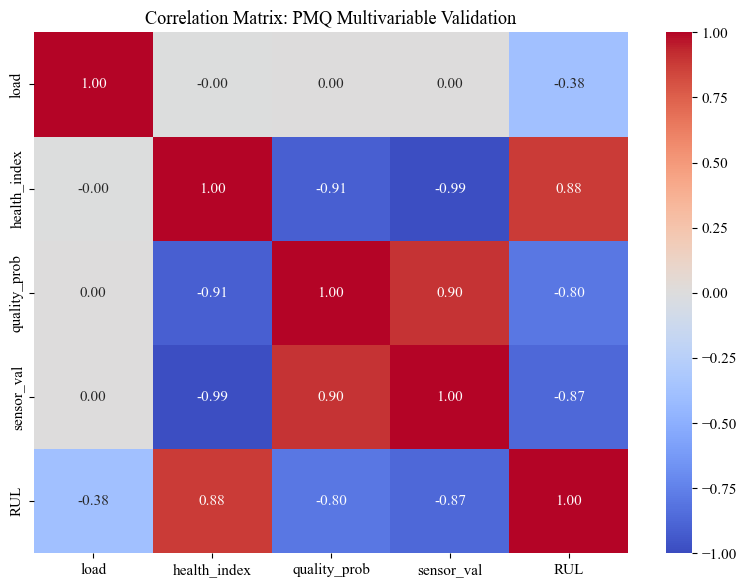

In [5]:
# Heatmap generation for technical documentation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix: PMQ Multivariable Validation')
plt.tight_layout()

# Export for LaTeX integration
plt.savefig('pmq_correlation_matrix.png', dpi=300)
plt.show()